In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import string
import random
import pickle
import matplotlib.pyplot as plt

In [2]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords 
lemmatizer = WordNetLemmatizer()

In [101]:
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense

In [4]:
df =pd.read_csv('../Project//data/all-data.csv', encoding='latin-1',header=None)

In [5]:
textual_data = df[1]

In [6]:
data = [i.strip() for i in textual_data]

In [7]:
def preprocess_data(data):
    data = [re.sub("[^a-zA-Z0-9 ]","",i) for i in data]
    return data

In [8]:
data = preprocess_data(data)

Bigram Analysis

In [90]:
words = []
for sent in data:
    for word in sent.split(' '):
        if word:
            words.append(word)

In [91]:
from collections import Counter
word_count = Counter(words)

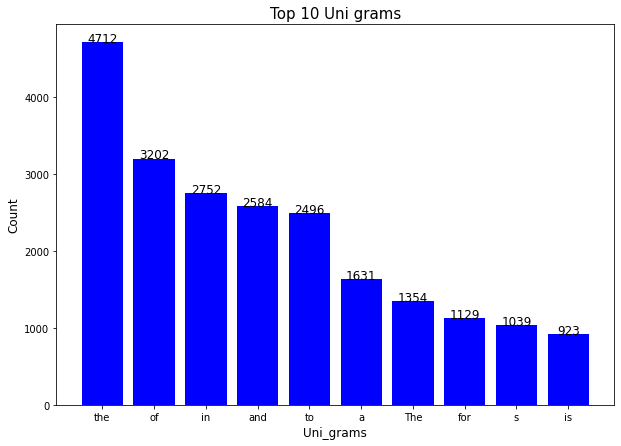

In [92]:
one_gram = sorted(word_count.items(),key = lambda x:x[1],reverse=True)
x_1_gram = [x for (x,y) in one_gram[:10]]
y_1_gram = [y for (x,y) in one_gram[:10]]

fig, ax = plt.subplots(figsize=(10,7))

plt.bar(x_1_gram,y_1_gram,color = 'b')

plt.xlabel("Uni_grams", size=12)
plt.ylabel("Count", size=12)
plt.title("Top 10 Uni grams", size=15)

for index in range(len(x_1_gram)):
    ax.text(x_1_gram[index], y_1_gram[index], y_1_gram[index], size=12,ha = 'center',va = 'baseline')
plt.show()

In [12]:
cleaned_sentences = []
for sent in data:
    words = []
    for word in sent.split(' '):
        if word:
            words.append(word)
    cleaned_sentences.append(' '.join(words))

In [13]:
bi_words = []
for sent in cleaned_sentences:
    senten = sent.split(' ')
    for i in range(len(senten)-1):
        bi_words.append(' '.join(senten[i:i+2]))

In [14]:
from collections import Counter
bi_word_count = Counter(bi_words)

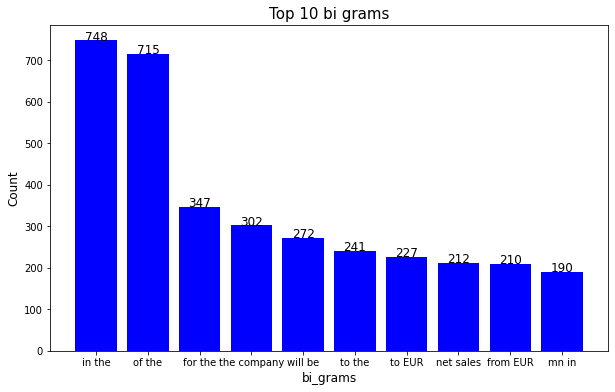

In [15]:
bi_gram = sorted(bi_word_count.items(),key = lambda x:x[1],reverse=True)
x_2_gram = [x for (x,y) in bi_gram[:10]]
y_2_gram = [y for (x,y) in bi_gram[:10]]

fig, ax = plt.subplots(figsize=(10,6))

plt.bar(x_2_gram,y_2_gram,color = 'b')

plt.xlabel("bi_grams", size=12)
plt.ylabel("Count", size=12)
plt.title("Top 10 bi grams", size=15)

for index in range(len(x_2_gram)):
    ax.text(x_2_gram[index], y_2_gram[index], y_2_gram[index], size=12,ha = 'center')
plt.show()

### N-grams without stop words

In [95]:
from collections import Counter
words = [word for word in words if not word.lower() in stopwords.words('english')]
word_count = Counter(words)

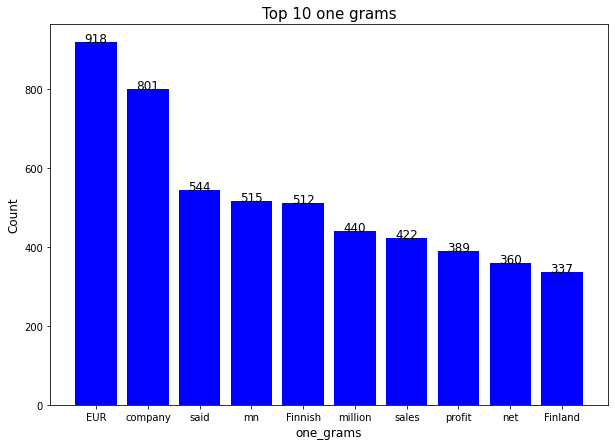

In [96]:
one_gram = sorted(word_count.items(),key = lambda x:x[1],reverse=True)
x_1_gram = [x for (x,y) in one_gram[:10]]
y_1_gram = [y for (x,y) in one_gram[:10]]

fig, ax = plt.subplots(figsize=(10,7))

plt.bar(x_1_gram,y_1_gram,color = 'b')

plt.xlabel("one_grams", size=12)
plt.ylabel("Count", size=12)
plt.title("Top 10 one grams", size=15)

for index in range(len(x_1_gram)):
    ax.text(x_1_gram[index], y_1_gram[index], y_1_gram[index], size=12,ha = 'center',va = 'baseline')
plt.show()

In [24]:
if 'The' and 'the' not in stopwords.words('english'):
    print("Yeah")
print('Oops')

Oops


In [25]:
cleaned_sentences = []
for sent in data:
    words = []
    for word in sent.split(' '):
        if word:
            if word.lower() not in stopwords.words('english'):
                words.append(word)
    cleaned_sentences.append(' '.join(words))

In [26]:
bi_words = []
for sent in cleaned_sentences:
    senten = sent.split(' ')
    for i in range(len(senten)-1):
        bi_words.append(' '.join(senten[i:i+2]))

In [27]:
bi_word_count = Counter(bi_words)

In [28]:
bi_gram = sorted(bi_word_count.items(),key = lambda x:x[1],reverse=True)
x_2_gram = [x for (x,y) in bi_gram[:10]]
y_2_gram = [y for (x,y) in bi_gram[:10]]

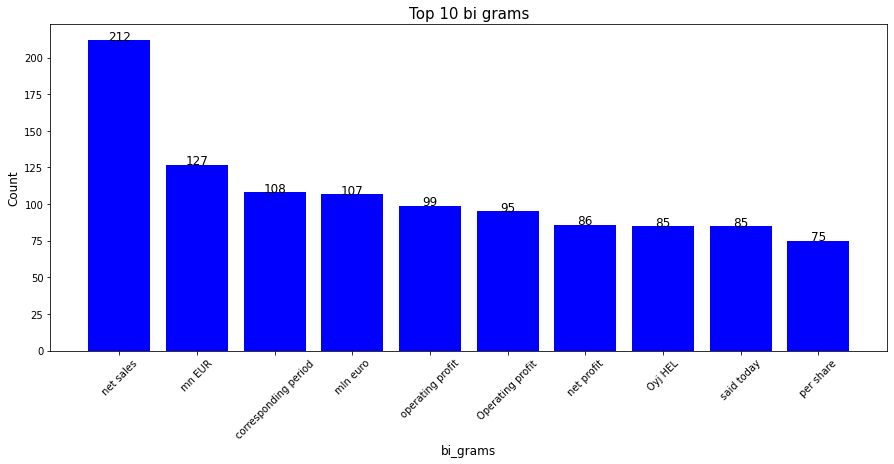

In [29]:
fig, ax = plt.subplots(figsize=(15,6))

plt.bar(x_2_gram,y_2_gram,color = 'b')

plt.xlabel("bi_grams", size=12)
plt.xticks(rotation=45)
plt.ylabel("Count", size=12)
plt.title("Top 10 bi grams", size=15)

for index in range(len(x_2_gram)):
    ax.text(x_2_gram[index], y_2_gram[index], y_2_gram[index], size=12,ha = 'center')
plt.show()

---

In [30]:
words = []
for sent in data:
    for word in sent.split(' '):
        if word:
            words.append(word)

In [31]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([words])

In [32]:
tokenizer.word_counts

OrderedDict([('according', 123),
             ('to', 2509),
             ('gran', 2),
             ('the', 6066),
             ('company', 848),
             ('has', 578),
             ('no', 53),
             ('plans', 39),
             ('move', 22),
             ('all', 96),
             ('production', 130),
             ('russia', 85),
             ('although', 3),
             ('that', 434),
             ('is', 928),
             ('where', 32),
             ('growing', 19),
             ('technopolis', 17),
             ('develop', 16),
             ('in', 2969),
             ('stages', 6),
             ('an', 326),
             ('area', 67),
             ('of', 3213),
             ('less', 11),
             ('than', 114),
             ('100000', 6),
             ('square', 21),
             ('meters', 6),
             ('order', 97),
             ('host', 2),
             ('companies', 122),
             ('working', 18),
             ('computer', 10),
             ('technologies', 

In [33]:
sequence_data = tokenizer.texts_to_sequences([words])[0]


In [34]:
len(tokenizer.word_index)

11245

In [35]:
seq = []

for i in range(2, len(words)):
    x_words = sequence_data[i-2:i+1]
    seq.append(x_words)
    
seq = np.array(seq)
seq[:10]

array([[  79,    5, 3543],
       [   5, 3543,    1],
       [3543,    1,   12],
       [   1,   12,   16],
       [  12,   16,  220],
       [  16,  220,  301],
       [ 220,  301,    5],
       [ 301,    5,  618],
       [   5,  618,  111],
       [ 618,  111,   73]])

In [36]:
X,Y = [],[]
for i in seq:
    X.append(i[0:2])
    Y.append(i[2])

In [37]:
X= np.array(X)
Y = np.array(Y)

In [38]:
from keras.utils.np_utils import to_categorical

In [39]:
Y = to_categorical(Y,num_classes=len(tokenizer.word_index)+1)


In [40]:
len(Y)

99291

In [54]:
model = Sequential()
model.add(Embedding(len(tokenizer.word_index)+1,10,input_length=2))
model.add(LSTM(1000,return_sequences=True))
model.add(LSTM(2000))
model.add(Dense(len(tokenizer.word_index)+1,activation="softmax"))

In [55]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 2, 10)             112460    
                                                                 
 lstm_4 (LSTM)               (None, 2, 1000)           4044000   
                                                                 
 lstm_5 (LSTM)               (None, 2000)              24008000  
                                                                 
 dense_4 (Dense)             (None, 11246)             22503246  
                                                                 
Total params: 50,667,706
Trainable params: 50,667,706
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.compile(loss="categorical_crossentropy",optimizer="Adam")
model.fit(X,Y,epochs=10,batch_size=256)

Epoch 1/10
388/388 [==============================] - 425s 1s/step - loss: 7.2379
Epoch 2/10
388/388 [==============================] - 421s 1s/step - loss: 6.7049
Epoch 3/10
388/388 [==============================] - 418s 1s/step - loss: 6.2520
Epoch 4/10
388/388 [==============================] - 420s 1s/step - loss: 5.7745
Epoch 5/10
388/388 [==============================] - 3761s 10s/step - loss: 5.3089
Epoch 6/10
388/388 [==============================] - 391s 1s/step - loss: 4.8634
Epoch 7/10
388/388 [==============================] - 388s 1s/step - loss: 4.4413
Epoch 8/10
388/388 [==============================] - 400s 1s/step - loss: 4.0589
Epoch 9/10
388/388 [==============================] - 418s 1s/step - loss: 3.7168
Epoch 10/10
388/388 [==============================] - 413s 1s/step - loss: 3.4168


In [57]:
model.save('model_main.h5')

In [64]:
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import plot_model

In [79]:
import graphviz

In [81]:
graphviz.__version__

'0.20.1'

In [82]:
plot_model (model, to_file = 'model.jpg', show_shapes = True, show_layer_names = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [58]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 2, 10)             112460    
                                                                 
 lstm_4 (LSTM)               (None, 2, 1000)           4044000   
                                                                 
 lstm_5 (LSTM)               (None, 2000)              24008000  
                                                                 
 dense_4 (Dense)             (None, 11246)             22503246  
                                                                 
Total params: 50,667,706
Trainable params: 50,667,706
Non-trainable params: 0
_________________________________________________________________


In [49]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [53]:
tf.keras.utils.plot_model(
model,
to_file="model.png",
show_shapes=True,
show_dtype=False,
show_layer_names=True,
rankdir="TB",
expand_nested=True,
dpi=96,
layer_range=None,
show_layer_activations=True,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [83]:
def Sentence_Complete(model, tokenizer, text):
    sequence = tokenizer.texts_to_sequences([text])
    sequence = np.array(sequence)
    preds = np.argmax(model.predict(sequence))
    predicted_word = ""
  
    for key, value in tokenizer.word_index.items():
            if value == preds:
                predicted_word = key
                break
    return predicted_word

In [105]:
model = keras.models.load_model('model.h5')

In [106]:
text = input("Enter your line: ")
  
if text == "0":
    print("Execution completed.....")
    #break

else:
    try:
        text = text.split(" ")
        text = text[-2:]
        print(text)

        result = Sentence_Complete(model, tokenizer, text)
        print(result)
    except Exception as e:
        print("Error occurred: ",e)
        #continue

Enter your line: I am
['I', 'am']
1/1 [==============================] - 1s 712ms/step
pleased


In [133]:
text = input("Enter your line: ")
text = text.split(" ")
text = text[-2:]
print(text)

Enter your line: Sales for both the department
['the', 'department']


In [134]:
Sentence_Complete(model, tokenizer, text)

1/1 [==============================] - 0s 28ms/step


'store'

In [170]:
pickle.dump(tokenizer, open('token.pkl','wb'))

In [171]:
pickle.dump(model, open('model.pkl','wb'))


Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\embedding
......vars
.........0
...layers\lstm
......vars
...layers\lstm\cell
......vars
.........0
.........1
.........2
...layers\lstm_1
......vars
...layers\lstm_1\cell
......vars
.........0
.........1
.........2
...metrics\mean
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........21
.........22
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2022-12-03 12:18:00         3466
metadata.json                                  2022-12-03 12:18:00       

In [104]:
from tensorflow import keras